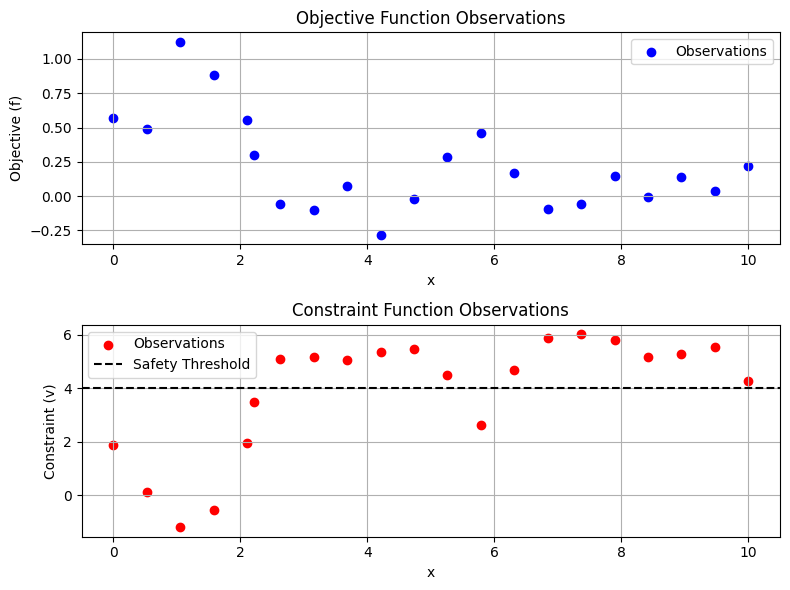

In [10]:
import re
import numpy as np
import matplotlib.pyplot as plt

raw = """
Adding observation: x=[2.22055514], f=[0.29755675], v=[3.47338531]
Adding observation: x=0.0, f=[0.57252792], v=[1.8943053]
Adding observation: x=0.5263157894736842, f=[0.4874718], v=[0.13909663]
Adding observation: x=1.0526315789473684, f=[1.12359509], v=[-1.18674693]
Adding observation: x=1.5789473684210527, f=[0.88319548], v=[-0.53720738]
Adding observation: x=2.1052631578947367, f=[0.5562022], v=[1.9484946]
Adding observation: x=2.631578947368421, f=[-0.05777217], v=[5.0893205]
Adding observation: x=3.1578947368421053, f=[-0.10268739], v=[5.18365681]
Adding observation: x=3.6842105263157894, f=[0.0716932], v=[5.07288359]
Adding observation: x=4.2105263157894735, f=[-0.28035755], v=[5.36023432]
Adding observation: x=4.7368421052631575, f=[-0.02076493], v=[5.46219127]
Adding observation: x=5.263157894736842, f=[0.28577848], v=[4.50153757]
Adding observation: x=5.789473684210526, f=[0.46345126], v=[2.62258258]
Adding observation: x=6.315789473684211, f=[0.16505074], v=[4.67130006]
Adding observation: x=6.842105263157895, f=[-0.09256976], v=[5.89705166]
Adding observation: x=7.368421052631579, f=[-0.05682921], v=[6.01578297]
Adding observation: x=7.894736842105263, f=[0.14856794], v=[5.80555731]
Adding observation: x=8.421052631578947, f=[-0.00697637], v=[5.16177776]
Adding observation: x=8.947368421052632, f=[0.13603901], v=[5.26863586]
Adding observation: x=9.473684210526315, f=[0.03885799], v=[5.55499625]
Adding observation: x=10.0, f=[0.21885542], v=[4.2762267]
"""

# Matches: x=<float>, f=<float>, v=<float>
pattern = r'x=\[?(-?\d+\.?\d*)\]?,\s*f=\[?(-?\d+\.?\d*)\]?,\s*v=\[?(-?\d+\.?\d*)\]?'

# Extract data using regex pattern
observations = [list(map(float, match)) for match in re.findall(pattern, raw)]
X = np.array([obs[0] for obs in observations]).reshape(-1,1)
Y = np.array([obs[1] for obs in observations]).reshape(-1,1) 
V = np.array([obs[2] for obs in observations]).reshape(-1,1)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot objective function values
ax1.scatter(X, Y, color='blue', label='Observations')
ax1.set_xlabel('x')
ax1.set_ylabel('Objective (f)')
ax1.set_title('Objective Function Observations')
ax1.grid(True)
ax1.legend()

# Plot constraint function values
ax2.scatter(X, V, color='red', label='Observations')
ax2.axhline(y=4.0, color='black', linestyle='--', label='Safety Threshold')
ax2.set_xlabel('x') 
ax2.set_ylabel('Constraint (v)')
ax2.set_title('Constraint Function Observations')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


In [7]:
DOMAIN = np.array([[0, 10]])  # restrict \theta in [0, 10]
np.linspace(*DOMAIN[0], 20)

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

### Posterior prediction

In [21]:
out_raw = """
Posterior at final iteration:
x,f_mean,f_std,v_mean,v_std
0.000,0.497,0.000,2.447,0.000
0.101,0.456,0.046,3.025,1.970
0.202,0.405,0.070,3.025,1.970
0.303,0.354,0.069,3.025,1.970
0.404,0.312,0.046,3.025,1.970
0.505,0.289,0.009,3.025,1.970
0.606,0.288,0.030,3.025,1.970
0.707,0.305,0.057,3.025,1.970
0.808,0.332,0.064,3.025,1.970
0.909,0.357,0.049,3.025,1.970
1.010,0.371,0.016,3.025,1.970
1.111,0.368,0.022,3.025,1.970
1.212,0.351,0.051,3.025,1.970
1.313,0.329,0.063,3.025,1.970
1.414,0.317,0.052,3.025,1.970
1.515,0.327,0.023,3.025,1.970
1.616,0.367,0.014,3.025,1.970
1.717,0.439,0.044,3.025,1.970
1.818,0.530,0.057,3.025,1.970
1.919,0.624,0.049,3.025,1.970
2.020,0.700,0.025,3.025,1.970
2.121,0.742,0.004,3.025,1.970
2.222,0.735,0.024,3.025,1.970
2.323,0.674,0.024,3.025,1.970
2.424,0.560,0.008,3.025,1.970
2.525,0.400,0.006,3.025,1.970
2.626,0.210,0.001,3.025,1.970
2.727,0.009,0.021,3.025,1.970
2.828,-0.179,0.043,3.025,1.970
2.929,-0.332,0.051,3.025,1.970
3.030,-0.430,0.038,3.025,1.970
3.131,-0.457,0.009,3.025,1.970
3.232,-0.408,0.026,3.025,1.970
3.333,-0.292,0.053,3.025,1.970
3.434,-0.132,0.061,3.025,1.970
3.535,0.048,0.048,3.025,1.970
3.636,0.219,0.018,3.025,1.970
3.737,0.363,0.020,3.025,1.970
3.838,0.473,0.050,3.025,1.970
3.939,0.556,0.063,3.025,1.970
4.040,0.621,0.054,3.025,1.970
4.141,0.684,0.026,3.025,1.970
4.242,0.753,0.012,3.025,1.970
4.343,0.832,0.045,3.025,1.970
4.444,0.915,0.062,3.025,1.970
4.545,0.991,0.058,3.025,1.970
4.646,1.046,0.033,3.025,1.970
4.747,1.071,0.004,3.025,1.970
4.848,1.061,0.039,3.025,1.970
4.949,1.021,0.060,3.025,1.970
5.051,0.963,0.060,3.025,1.970
5.152,0.900,0.039,3.025,1.970
5.253,0.845,0.004,3.025,1.970
5.354,0.806,0.033,3.025,1.970
5.455,0.787,0.058,3.025,1.970
5.556,0.788,0.062,3.025,1.970
5.657,0.806,0.045,3.025,1.970
5.758,0.835,0.012,3.025,1.970
5.859,0.869,0.026,3.025,1.970
5.960,0.901,0.054,3.025,1.970
6.061,0.924,0.063,3.025,1.970
6.162,0.930,0.051,3.025,1.970
6.263,0.914,0.020,3.025,1.970
6.364,0.870,0.018,3.025,1.970
6.465,0.799,0.049,3.025,1.970
6.566,0.708,0.063,3.025,1.970
6.667,0.604,0.055,3.025,1.970
6.768,0.495,0.028,3.025,1.970
6.869,0.390,0.010,3.025,1.970
6.970,0.295,0.044,3.025,1.970
7.071,0.215,0.062,3.025,1.970
7.172,0.151,0.058,3.025,1.970
7.273,0.107,0.035,3.025,1.970
7.374,0.083,0.002,3.025,1.970
7.475,0.078,0.038,3.025,1.970
7.576,0.091,0.060,3.025,1.970
7.677,0.117,0.061,3.025,1.970
7.778,0.152,0.041,3.025,1.970
7.879,0.191,0.006,3.025,1.970
7.980,0.231,0.031,3.025,1.970
8.081,0.265,0.057,3.025,1.970
8.182,0.290,0.063,3.025,1.970
8.283,0.301,0.047,3.025,1.970
8.384,0.295,0.014,3.025,1.970
8.485,0.272,0.024,3.025,1.970
8.586,0.233,0.054,3.025,1.970
8.687,0.185,0.064,3.025,1.970
8.788,0.135,0.053,3.025,1.970
8.889,0.089,0.023,3.025,1.970
8.990,0.052,0.017,3.025,1.970
9.091,0.029,0.052,3.025,1.970
9.192,0.016,0.071,3.025,1.970
9.293,0.013,0.067,3.025,1.970
9.394,0.016,0.038,3.025,1.970
9.495,0.021,0.012,3.025,1.970
9.596,0.026,0.074,3.025,1.970
9.697,0.030,0.141,3.025,1.970
9.798,0.033,0.205,3.025,1.970
9.899,0.034,0.265,3.025,1.970
10.000,0.034,0.317,3.025,1.970

Observed data:
x,f,v
2.471,0.491,3.489
0.000,0.497,2.447
0.526,0.287,2.035
1.053,0.372,1.296
1.579,0.349,0.941
2.105,0.738,1.988
2.632,0.199,4.281
3.158,-0.452,4.986
3.684,0.291,3.932
4.211,0.730,1.648
4.737,1.070,1.182
5.263,0.840,0.278
5.789,0.845,-0.311
6.316,0.894,0.839
6.842,0.417,3.833
7.368,0.084,5.575
7.895,0.198,4.953
8.421,0.289,5.356
8.947,0.066,6.130
9.474,0.020,5.616
"""

import pandas as pd
from io import StringIO

# Split the raw string into posterior and observed sections
posterior_section, observed_section = out_raw.split("\nObserved data:\n")

# Create dataframe for posterior predictions
df_posterior = pd.read_csv(StringIO(posterior_section), skiprows=2)

# Create dataframe for observed data
df_observed = pd.read_csv(StringIO(observed_section))

# Display first few rows of both dataframes
print("Posterior predictions:")
print(df_posterior.head())
print("\nObserved data:")
print(df_observed.head())

Posterior predictions:
                          Posterior at final iteration:
x     f_mean f_std v_mean                         v_std
0.000 0.497  0.000 2.447                          0.000
0.101 0.456  0.046 3.025                          1.970
0.202 0.405  0.070 3.025                          1.970
0.303 0.354  0.069 3.025                          1.970

Observed data:
       x      f      v
0  2.471  0.491  3.489
1  0.000  0.497  2.447
2  0.526  0.287  2.035
3  1.053  0.372  1.296
4  1.579  0.349  0.941


In [25]:
df_posterior

,,,,Posterior at final iteration:
x,f_mean,f_std,v_mean,v_std
0.000,0.497,0.000,2.447,0.000
0.101,0.456,0.046,3.025,1.970
0.202,0.405,0.070,3.025,1.970
0.303,0.354,0.069,3.025,1.970
...,...,...,...,...
9.596,0.026,0.074,3.025,1.970
9.697,0.030,0.141,3.025,1.970
9.798,0.033,0.205,3.025,1.970
9.899,0.034,0.265,3.025,1.970


KeyError: 'x'

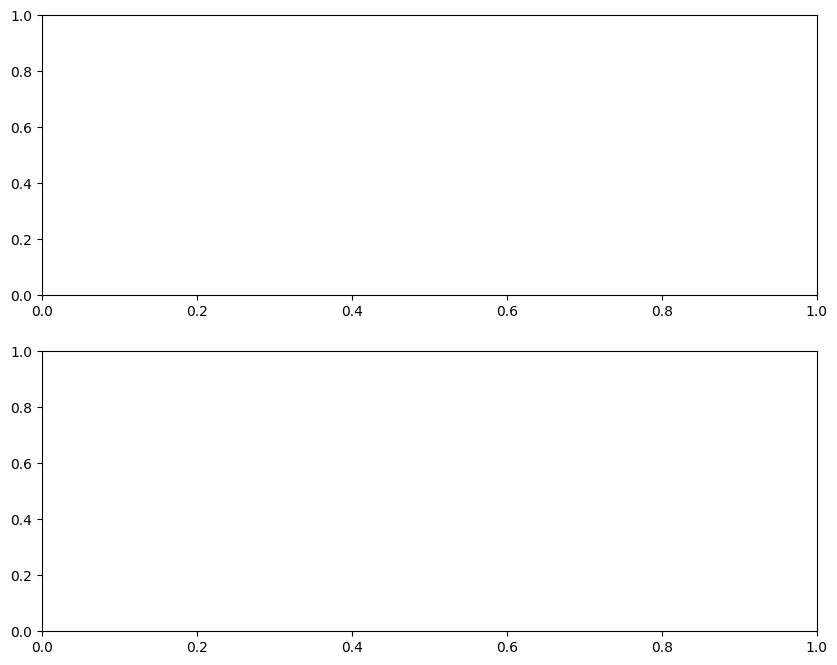

In [22]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot for objective function f
ax1.plot(df_posterior['x'], df_posterior['f_mean'], 'b-', label='Posterior mean')
ax1.fill_between(df_posterior['x'], 
                 df_posterior['f_mean'] - 2*df_posterior['f_std'],
                 df_posterior['f_mean'] + 2*df_posterior['f_std'], 
                 color='b', alpha=0.2, label='95% confidence')
ax1.scatter(df_observed['x'], df_observed['f'], color='r', label='Observations')
ax1.set_title('Objective Function (f)')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.legend()

# Plot for constraint function v
ax2.plot(df_posterior['x'], df_posterior['v_mean'], 'g-', label='Posterior mean')
ax2.fill_between(df_posterior['x'],
                 df_posterior['v_mean'] - 2*df_posterior['v_std'],
                 df_posterior['v_mean'] + 2*df_posterior['v_std'],
                 color='g', alpha=0.2, label='95% confidence')
ax2.scatter(df_observed['x'], df_observed['v'], color='r', label='Observations')
ax2.axhline(y=4, color='r', linestyle='--', label='Safety threshold')
ax2.set_title('Constraint Function (v)')
ax2.set_xlabel('x')
ax2.set_ylabel('v(x)')
ax2.legend()

plt.tight_layout()
plt.show()